# Lead Score Case Study


#### Problem Statement:

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance.

**So interpretation is important!**

# <font color='Red'>Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike dataset

In [3]:
# suppress the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
# Adjusting so as to see all the rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [6]:
# reading the dataset
df1 = pd.read_csv("Leads.csv")
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# lets check the shape of the data
df1.shape

(9240, 37)

Data set consist of 9240 rows and 37 columns

In [9]:
# checking for info of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like the data set have null values

# <font color='Red'>Step 2: Cleaning the dataset

In [11]:
# Checking the columns for one unique value
df1.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [12]:
# dropping unique value columns
df1.drop(columns=['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content',
                 'Receive More Updates About Our Courses','Magazine'],axis =1,inplace = True)

In [13]:
# lets check the percentage of the null values
(df1.isnull().mean()*100).sort_values(ascending = False)

Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

## Removing the columns having more than 35% null values

In [14]:
# columns having more than 35% missing values in current application column
null_col = df1.columns[(df1.isnull().mean()*100)>= 35]
null_col

Index(['Tags', 'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [15]:
df1.drop(columns = null_col,inplace = True)

In [16]:
# checking the shape again
df1.shape

(9240, 26)

In [17]:
# dealing with rest of the null columns
(df1.isnull().mean()*100).sort_values(ascending = False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Newspaper                                         0.000000
Digital Advertisement                             0.000000
Newspaper Article                                 0.000000
Through Recommendations                           0.000000
A free copy of Mastering The Interview            0.000000
X Education Forums                                0.0000

The above columns cannot be removed because they are important for analysis so filling the missing values with 'Not Available'

In [18]:
# filling na with "Not Available"
df1['What matters most to you in choosing a course'].fillna(value="Not Available", inplace=True)
df1['Lead Profile'].fillna(value="Not Available", inplace=True)
df1['What is your current occupation'].fillna(value="Not Available", inplace=True)
df1['Country'].fillna(value="Not Available", inplace=True)
df1['How did you hear about X Education'].fillna(value="Not Available", inplace=True)
df1['Specialization'].fillna(value="Not Available", inplace=True)
df1['City'].fillna(value="Not Available", inplace=True)

In [19]:
# checking the value count of country
df1["Country"].value_counts()

India                   6492
Not Available           2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

Here we can combine all the countries outside India

In [21]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Available":
        category = "Not Available"
    else:
        category = "Outside India"
    return category

df1['Country'] = df1.apply(lambda x:slots(x['Country']), axis = 1)
df1['Country'].value_counts()

India            6492
Not Available    2461
Outside India     287
Name: Country, dtype: int64

In [22]:
# dealing with rest of the null columns
(df1.isnull().mean()*100).sort_values(ascending = False)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Prospect ID                                      0.000000
What matters most to you in choosing a course    0.000000
A free copy of Mastering The Interview           0.000000
City                                             0.000000
Lead Profile                                     0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
Newspaper Article                                0.000000
Search                                           0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
Lead Number   

Rest of the columns only make 1% so it can be removed

In [23]:
df1 =  df1[~df1['TotalVisits'].isnull()]
df1 =  df1[~df1['Page Views Per Visit'].isnull()]
df1 =  df1[~df1['Last Activity'].isnull()]
df1 =  df1[~df1['Lead Source'].isnull()]

In [24]:
df1.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

### Now there are no null values

In [26]:
df1.shape # shape after removing the null values

(9074, 26)

In [27]:
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Available,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,Mumbai,No,Modified


In [28]:
## dropping Prospect ID,Lead Number because they are unique and not useful in the analysis
df1.drop(columns=['Prospect ID','Lead Number'],axis = 1, inplace = True)

In [29]:
# lets check if they are in proper type or not
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

# <font color='Red'>Step 3: Data Preparation

### Creating dummy variables

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [31]:
df1.loc[:, df1.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [32]:
# Creating dummy variables 
dummy1 = pd.get_dummies(df1[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity']])

# adding it to the final dataframe
df = pd.concat([df1,dummy1],axis = 1)
df.head()

# dropping the columns from final df
df.drop(columns = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Profile',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],axis = 1,inplace = True )

In [33]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Available,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,Select,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Select,Mumbai,No,Modified


In [35]:
df.shape

(9074, 140)

# <font color='Red'>Step 5: Test-Train Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_India,Country_Not Available,Country_Outside India,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Available,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Available,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Not Available,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Mumbai,City_Not Available,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable 

In [38]:
# Putting feature variable to X
X = df.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_India,Country_Not Available,Country_Outside India,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Available,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Available,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Not Available,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Mumbai,City_Not Available,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_E

In [39]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [40]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_India,Country_Not Available,Country_Outside India,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Available,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Available,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Not Available,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Mumbai,City_Not Available,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_E

In [43]:
### Checking the Conversion Rate
converted = (sum(df['Converted'])/len(df['Converted'].index))*100
converted

37.85541106458012

#### We have almost 38% conversion rate

## Looking at the correlation

In [45]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

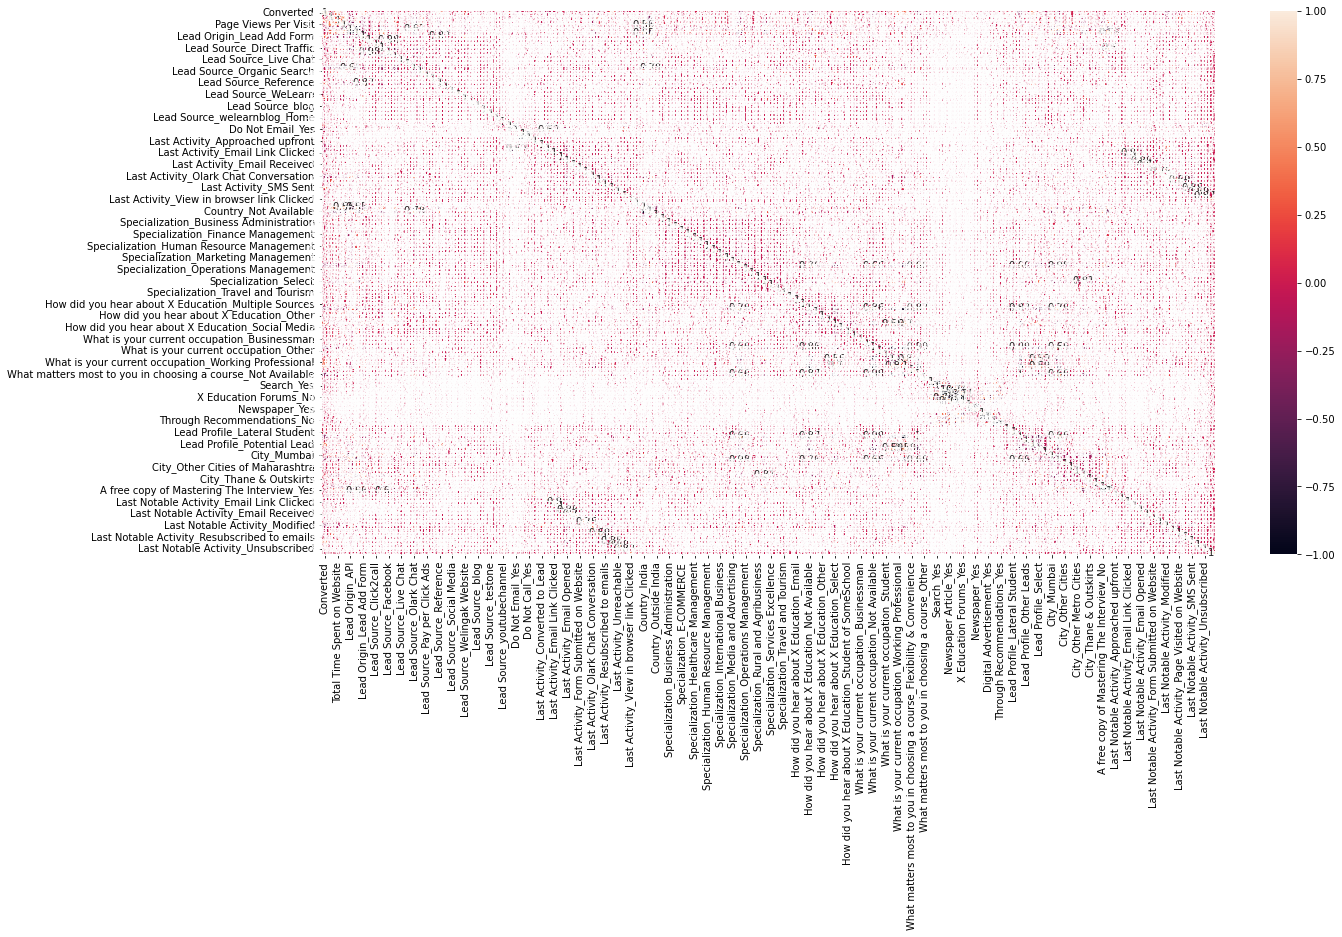

In [46]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

Since there are lots of variables we will do it after RFE

# <font color='Red'>Step 6: Model Building

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [48]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_India,Country_Not Available,Country_Outside India,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Available,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Available,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Not Available,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Mumbai,City_Not Available,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable 

In [49]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = logreg, n_features_to_select =  15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [50]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [51]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 88),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 89),
 ('Lead Origin_API', False, 44),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 116),
 ('Lead Source_Click2call', False, 15),
 ('Lead Source_Direct Traffic', False, 31),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 34),
 ('Lead Source_Live Chat', False, 70),
 ('Lead Source_NC_EDM', False, 14),
 ('Lead Source_Olark Chat', False, 45),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 96),
 ('Lead Source_Press_Release', False, 112),
 ('Lead Source_Reference', False, 58),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Social Media', False, 60),
 ('Lead Source_WeLearn', False, 125),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 71),
 ('Lead Source_blog', False, 66),
 ('Lead Source_google', False, 49),
 (

In [52]:
col = X_train.columns[rfe.support_]

In [53]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Click2call', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=124)

In [54]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.6
Date:                Thu, 16 Mar 2023   Deviance:                       5171.1
Time:                        16:50:38   Pearson chi2:                 6.49e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4048
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6095      0.050    -32.202      0.000      -1.707      -1.512
Total Time Spent on Website                              0.9162      0.036     25.807      0.000       0.847       0.986
Lead Origin_Lead Add Form                                3.0220      0.225     13.423      0.000       2.581       3.463
Lead Source_Welingak Website                             2.6971      0.756      3.567      0.000       1.215       4.179
Do Not Email_Yes                                        -1.7630      0.187     -9.424      0.000      -2.130      -1.396
Last Activity_Approached upfront                        25.9227   5.09e+04      0.001      1.000   -9.97e+04    9.97e+04
Last Activity_Had a Phone Conversation                   2.5970      0.754      3.444      0.001       1.119       4.075
Last Activity_SMS Sent                                   1.4808      0.074     20.028      0.000       1.336       1.626
Last Activity_Unsubscribed                               1.5912      0.486      3.275      0.001       0.639       2.544
What is your current occupation_Housewife               25.0217   4.14e+04      0.001      1.000   -8.11e+04    8.11e+04
What is your current occupation_Working Professional     2.4838      0.191     12.992      0.000       2.109       2.859
Lead Profile_Dual Specialization Student                24.8864   3.15e+04      0.001      0.999   -6.16e+04    6.17e+04
Lead Profile_Lateral Student                            24.6563   3.15e+04      0.001      0.999   -6.17e+04    6.17e+04
Lead Profile_Potential Lead                              1.8020      0.098     18.450      0.000       1.611       1.993
Lead Profile_Student of SomeSchool                      -2.0014      0.495     -4.039      0.000      -2.973      -1.030
Last Notable Activity_Unreachable                        1.6953      0.494      3.432      0.001       0.727       2.663
========================================================================================================================
"""

###  Check for the VIF values of the feature variables.

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.68
2,Lead Source_Welingak Website,1.36
12,Lead Profile_Potential Lead,1.33
9,What is your current occupation_Working Profes...,1.23
6,Last Activity_SMS Sent,1.20
0,Total Time Spent on Website,1.11
3,Do Not Email_Yes,1.11
7,Last Activity_Unsubscribed,1.08
10,Lead Profile_Dual Specialization Student,1.01
13,Lead Profile_Student of SomeSchool,1.01


The VIF values seems fine so as per p-value removing 'Last Activity_Approached upfront'

In [57]:
col = col.drop('Last Activity_Approached upfront', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Profile_Dual Specialization Student',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [58]:
# refitting the model again
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.7
Date:                Thu, 16 Mar 2023   Deviance:                       5185.5
Time:                        16:51:57   Pearson chi2:                 6.50e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6015      0.050    -32.140      0.000      -1.699      -1.504
Total Time Spent on Website                              0.9163      0.035     25.855      0.000       0.847       0.986
Lead Origin_Lead Add Form                                3.0189      0.225     13.415      0.000       2.578       3.460
Lead Source_Welingak Website                             2.6954      0.756      3.565      0.000       1.213       4.177
Do Not Email_Yes                                        -1.7654      0.187     -9.443      0.000      -2.132      -1.399
Last Activity_Had a Phone Conversation                   2.5902      0.754      3.435      0.001       1.112       4.068
Last Activity_SMS Sent                                   1.4737      0.074     19.957      0.000       1.329       1.618
Last Activity_Unsubscribed                               1.5870      0.486      3.267      0.001       0.635       2.539
What is your current occupation_Housewife               24.0146   2.51e+04      0.001      0.999   -4.92e+04    4.92e+04
What is your current occupation_Working Professional     2.4789      0.191     12.972      0.000       2.104       2.853
Lead Profile_Dual Specialization Student                23.8829   1.91e+04      0.001      0.999   -3.74e+04    3.74e+04
Lead Profile_Lateral Student                            23.6501   1.91e+04      0.001      0.999   -3.74e+04    3.74e+04
Lead Profile_Potential Lead                              1.7961      0.098     18.404      0.000       1.605       1.987
Lead Profile_Student of SomeSchool                      -2.0087      0.495     -4.055      0.000      -2.980      -1.038
Last Notable Activity_Unreachable                        1.6887      0.494      3.420      0.001       0.721       2.656
========================================================================================================================
"""

In [59]:
# checking vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.68
2,Lead Source_Welingak Website,1.36
11,Lead Profile_Potential Lead,1.33
8,What is your current occupation_Working Profes...,1.23
5,Last Activity_SMS Sent,1.20
0,Total Time Spent on Website,1.11
3,Do Not Email_Yes,1.11
6,Last Activity_Unsubscribed,1.08
9,Lead Profile_Dual Specialization Student,1.01
12,Lead Profile_Student of SomeSchool,1.01


VIF is good so removing What is your current occupation_Housewife as per p-value

In [60]:
col = col.drop('What is your current occupation_Housewife', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.2
Date:                Thu, 16 Mar 2023   Deviance:                       5196.3
Time:                        16:52:42   Pearson chi2:                 6.51e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4024
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5955      0.050    -32.091      0.000      -1.693      -1.498
Total Time Spent on Website                              0.9165      0.035     25.891      0.000       0.847       0.986
Lead Origin_Lead Add Form                                3.0539      0.225     13.594      0.000       2.614       3.494
Lead Source_Welingak Website                             2.6577      0.756      3.515      0.000       1.176       4.139
Do Not Email_Yes                                        -1.7689      0.187     -9.460      0.000      -2.135      -1.402
Last Activity_Had a Phone Conversation                   2.5852      0.754      3.428      0.001       1.107       4.063
Last Activity_SMS Sent                                   1.4675      0.074     19.889      0.000       1.323       1.612
Last Activity_Unsubscribed                               1.5855      0.486      3.264      0.001       0.634       2.537
What is your current occupation_Working Professional     2.4742      0.191     12.948      0.000       2.100       2.849
Lead Profile_Dual Specialization Student                23.8817   1.91e+04      0.001      0.999   -3.74e+04    3.74e+04
Lead Profile_Lateral Student                            23.6432   1.91e+04      0.001      0.999   -3.74e+04    3.74e+04
Lead Profile_Potential Lead                              1.7919      0.098     18.376      0.000       1.601       1.983
Lead Profile_Student of SomeSchool                      -2.0158      0.496     -4.066      0.000      -2.988      -1.044
Last Notable Activity_Unreachable                        1.6836      0.494      3.411      0.001       0.716       2.651
========================================================================================================================
"""

In [61]:
# checking vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.67
2,Lead Source_Welingak Website,1.36
10,Lead Profile_Potential Lead,1.32
7,What is your current occupation_Working Profes...,1.22
5,Last Activity_SMS Sent,1.20
0,Total Time Spent on Website,1.11
3,Do Not Email_Yes,1.11
6,Last Activity_Unsubscribed,1.08
8,Lead Profile_Dual Specialization Student,1.01
11,Lead Profile_Student of SomeSchool,1.01


VIF is good so removing Lead Profile_Lateral Student as per p-value

In [63]:
col = col.drop('Lead Profile_Lateral Student', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.9
Date:                Thu, 16 Mar 2023   Deviance:                       5215.8
Time:                        16:53:21   Pearson chi2:                 6.54e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4006
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5862      0.050    -32.011      0.000      -1.683      -1.489
Total Time Spent on Website                              0.9207      0.035     26.033      0.000       0.851       0.990
Lead Origin_Lead Add Form                                3.0844      0.224     13.752      0.000       2.645       3.524
Lead Source_Welingak Website                             2.6393      0.755      3.494      0.000       1.159       4.120
Do Not Email_Yes                                        -1.7536      0.185     -9.456      0.000      -2.117      -1.390
Last Activity_Had a Phone Conversation                   2.5763      0.754      3.418      0.001       1.099       4.053
Last Activity_SMS Sent                                   1.4604      0.074     19.819      0.000       1.316       1.605
Last Activity_Unsubscribed                               1.5629      0.485      3.222      0.001       0.612       2.514
What is your current occupation_Working Professional     2.4841      0.191     13.033      0.000       2.111       2.858
Lead Profile_Dual Specialization Student                22.8673   1.16e+04      0.002      0.998   -2.26e+04    2.27e+04
Lead Profile_Potential Lead                              1.7817      0.097     18.276      0.000       1.591       1.973
Lead Profile_Student of SomeSchool                      -2.0297      0.496     -4.089      0.000      -3.003      -1.057
Last Notable Activity_Unreachable                        1.6760      0.494      3.395      0.001       0.708       2.643
========================================================================================================================
"""

In [64]:
# removing Lead Profile_Dual Specialization Student
col = col.drop('Lead Profile_Dual Specialization Student', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.9
Date:                Thu, 16 Mar 2023   Deviance:                       5235.8
Time:                        16:53:32   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3987
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5789      0.049    -31.955      0.000      -1.676      -1.482
Total Time Spent on Website                              0.9225      0.035     26.116      0.000       0.853       0.992
Lead Origin_Lead Add Form                                3.0789      0.224     13.735      0.000       2.640       3.518
Lead Source_Welingak Website                             2.6346      0.755      3.489      0.000       1.154       4.115
Do Not Email_Yes                                        -1.7303      0.184     -9.411      0.000      -2.091      -1.370
Last Activity_Had a Phone Conversation                   2.5682      0.753      3.411      0.001       1.093       4.044
Last Activity_SMS Sent                                   1.4591      0.074     19.835      0.000       1.315       1.603
Last Activity_Unsubscribed                               1.5350      0.484      3.169      0.002       0.586       2.484
What is your current occupation_Working Professional     2.4994      0.190     13.165      0.000       2.127       2.872
Lead Profile_Potential Lead                              1.7735      0.097     18.199      0.000       1.582       1.964
Lead Profile_Student of SomeSchool                      -2.0395      0.497     -4.107      0.000      -3.013      -1.066
Last Notable Activity_Unreachable                        1.6692      0.494      3.382      0.001       0.702       2.636
========================================================================================================================
"""

In [65]:
# checking vif again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.67
2,Lead Source_Welingak Website,1.36
8,Lead Profile_Potential Lead,1.32
7,What is your current occupation_Working Profes...,1.22
5,Last Activity_SMS Sent,1.20
0,Total Time Spent on Website,1.11
3,Do Not Email_Yes,1.11
6,Last Activity_Unsubscribed,1.08
9,Lead Profile_Student of SomeSchool,1.01
4,Last Activity_Had a Phone Conversation,1.00


### VIF and p-value are good so we have got our model

# <font color='Red'>Step 7: Prediction

In [67]:
# predicting on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

3009    0.151009
1012    0.212818
9226    0.280991
4750    0.801585
7987    0.850880
          ...   
367     0.263209
82      0.866943
8199    0.894673
7077    0.164961
5754    0.368929
Length: 6351, dtype: float64

In [68]:
# reshaping the predicted
y_train_pred.values.reshape(-1)

array([0.15100931, 0.21281841, 0.28099085, ..., 0.89467298, 0.16496149,
       0.36892941])

In [69]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
3009,0,0.151009
1012,0,0.212818
9226,0,0.280991
4750,1,0.801585
7987,1,0.850880


In [70]:
# Creating new column 'predicted' with 1 if Cconversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
3009,0,0.151009,0
1012,0,0.212818,0
9226,0,0.280991,0
4750,1,0.801585,1
7987,1,0.850880,1


# <font color='Red'>Step 8: Model Evaluation

In [71]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [72]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8165643205794363


## accuracy is 81% which is good

In [73]:
# Let's take a look at the confusion matrix  
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3521,  384],
       [ 781, 1665]], dtype=int64)

In [74]:
# Actual/Predicted     not_churn    churn
        # not_churn        3521     384
        # churn            781       1665 

In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6807031888798037

In [77]:
# Let us calculate specificity
TN / float(TN+FP)

0.9016645326504481

In [78]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09833546734955186


In [79]:
# positive predictive value 
print (TP / float(TP+FP))

0.8125915080527086


In [80]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8184565318456531


### With the accuracy of 81% we have senitivity 68% and specificity 90% with the cutoff at 0.5

# <font color='Red'>Step 9: Plotting the ROC curve

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

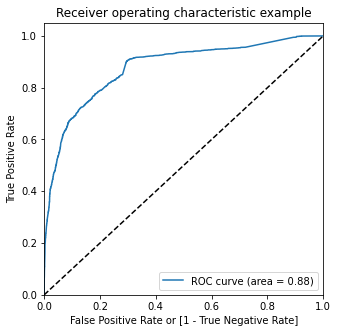

In [84]:
# drawing ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cutoff Point

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.151009,0,1,1,0,0,0,0,0,0,0,0
1012,0,0.212818,0,1,1,1,0,0,0,0,0,0,0
9226,0,0.280991,0,1,1,1,0,0,0,0,0,0,0
4750,1,0.801585,1,1,1,1,1,1,1,1,1,1,0
7987,1,0.850880,1,1,1,1,1,1,1,1,1,1,0


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.612502  0.946034  0.403585
0.2   0.2  0.769800  0.914554  0.679129
0.3   0.3  0.775941  0.838103  0.737004
0.4   0.4  0.805070  0.747343  0.841229
0.5   0.5  0.816564  0.680703  0.901665
0.6   0.6  0.812628  0.626738  0.929065
0.7   0.7  0.790742  0.538021  0.949040
0.8   0.8  0.764919  0.433361  0.972599
0.9   0.9  0.718155  0.284546  0.989757


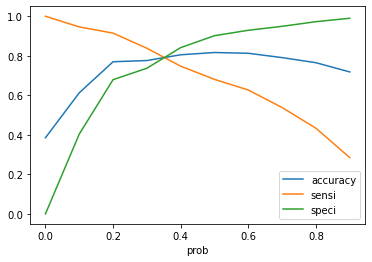

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.151009,0,1,1,0,0,0,0,0,0,0,0,0
1012,0,0.212818,0,1,1,1,0,0,0,0,0,0,0,0
9226,0,0.280991,0,1,1,1,0,0,0,0,0,0,0,0
4750,1,0.801585,1,1,1,1,1,1,1,1,1,1,0,1
7987,1,0.850880,1,1,1,1,1,1,1,1,1,1,0,1


In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7926310817194142

In [90]:
# confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3091,  814],
       [ 503, 1943]], dtype=int64)

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.794358135731807

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.7915492957746478

In [94]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2084507042253521


In [95]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7047515415306492


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8600445186421815


### We got 79% accuracy with 79% sensitivity and 79% specificity with 0.35 cutoff

# <font color='Red'>Step 10: Making predictions on the test set

In [97]:
scaler = StandardScaler()

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_No,Do Not Email_Yes,Do Not Call_No,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_India,Country_Not Available,Country_Outside India,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Available,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Not Available,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Available,What matters most to you in choosing a course_Other,Search_No,Search_Yes,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Not Available,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Mumbai,City_Not Available,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_E

In [98]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Working Professional,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Unreachable
3271,-0.591008,0,0,0,0,0,0,0,0,0,0
1490,1.894051,0,0,0,0,0,0,1,1,0,0
7936,-0.743117,0,0,0,0,0,0,0,0,0,0
4216,-0.878732,1,0,0,0,0,0,0,0,0,0
3830,-0.578179,0,0,0,0,0,0,0,0,0,0


In [99]:
# adding constant
X_test_sm = sm.add_constant(X_test)

### Making predictions

In [100]:
y_test_pred = res.predict(X_test_sm)

In [101]:
y_test_pred[:10]

3271    0.106778
1490    0.988357
7936    0.094114
4216    0.665839
3830    0.107912
1800    0.882034
6507    0.329089
4821    0.225047
4223    0.895532
4714    0.282843
dtype: float64

In [102]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [103]:
# Let's see the head
y_pred_1.head()

,0
3271,0.106778
1490,0.988357
7936,0.094114
4216,0.665839
3830,0.107912


In [104]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [105]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [106]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [107]:
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.106778
1,1,0.988357
2,0,0.094114
3,1,0.665839
4,0,0.107912


## prediction with 0.35 cutoff

In [108]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [109]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.106778,0
1,1,0.988357,1
2,0,0.094114,0
3,1,0.665839,1
4,0,0.107912,0


In [110]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7858979067205288

In [111]:
# confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1362,  372],
       [ 211,  778]], dtype=int64)

In [112]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [113]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7866531850353893

In [114]:
# Let us calculate specificity
TN / float(TN+FP)

0.7854671280276817

### We got the accuracy of 78% with sensitivity 78% and specificity at cutoff of 0.35

# <font color='Red'>Step 11: Precision and Recall

In [115]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3521,  384],
       [ 781, 1665]], dtype=int64)

##### Precision

In [116]:
# TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8125915080527086

#### Recall

In [117]:
# TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6807031888798037

In [118]:
from sklearn.metrics import precision_score, recall_score

In [119]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)


0.8125915080527086

In [120]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6807031888798037

### Precision and recall tradeoff

In [121]:
from sklearn.metrics import precision_recall_curve

In [122]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(3009    0
 1012    0
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    0
 7077    0
 5754    0
 Name: Converted, Length: 6351, dtype: int64,
 3009    0
 1012    0
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    1
 7077    0
 5754    0
 Name: predicted, Length: 6351, dtype: int64)

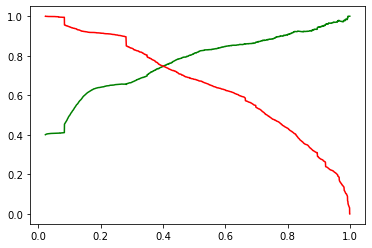

In [123]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### here we got precision of 81% and recall of 68% at cutoff 0.41

### Making predictions on 0.41 cutoff

In [124]:
y_test_pred = res.predict(X_test_sm)
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.106778
1,1,0.988357
2,0,0.094114
3,1,0.665839
4,0,0.107912


In [125]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [126]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.106778,0
1,1,0.988357,1
2,0,0.094114,0
3,1,0.665839,1
4,0,0.107912,0


In [127]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8009548292324642

In [128]:
# confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1475,  259],
       [ 283,  706]], dtype=int64)

In [129]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7138523761375126

In [131]:
# Let us calculate specificity
TN / float(TN+FP)

0.850634371395617

### At cutoff 0.41 we got 80% accuracy 71% sensitivity and 85% specificity